# Introduction

In this tutorial, we will evaluate our clustering analysis

# Standard Imports

In [5]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# generate a two-dimensional dataset containing four distinct blobs.¶

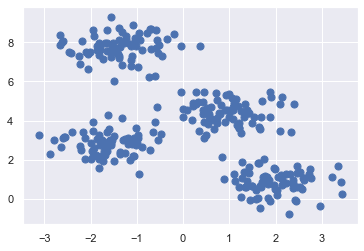

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

# Cluster Tendency

In this section, we will use Hopkins statistic (H) to check if the data have a cluster structure:
    
If the H value is between {0.01, ...,0.3}, the data is regularly spaced.

If the H value is around 0.5, it is random.

If the H value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


In [7]:
d = 2 # 2D columns
n = len(X) # rows
m = int(0.1 * n) # heuristic from article [1]

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X)

from random import sample
rand_X = sample(range(0, n, 1), m)

ujd = []
wjd = []
for j in range(0, m):
    u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True)
    ujd.append(u_dist[0][1])
    w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
    wjd.append(w_dist[0][1])

H = sum(ujd) / (sum(ujd) + sum(wjd))
print(H)

0.878273089387291


# K-Mean

## Choosing N-Cluster

We are going to use the silhouette analysis to choose the suitable number of clusters. We will vary the number of clusters from 2 to 6. 

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566


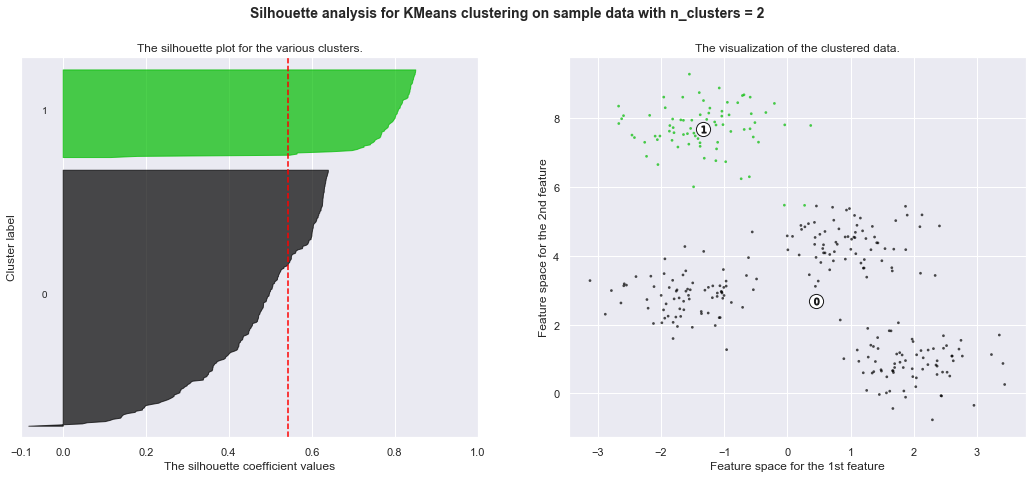

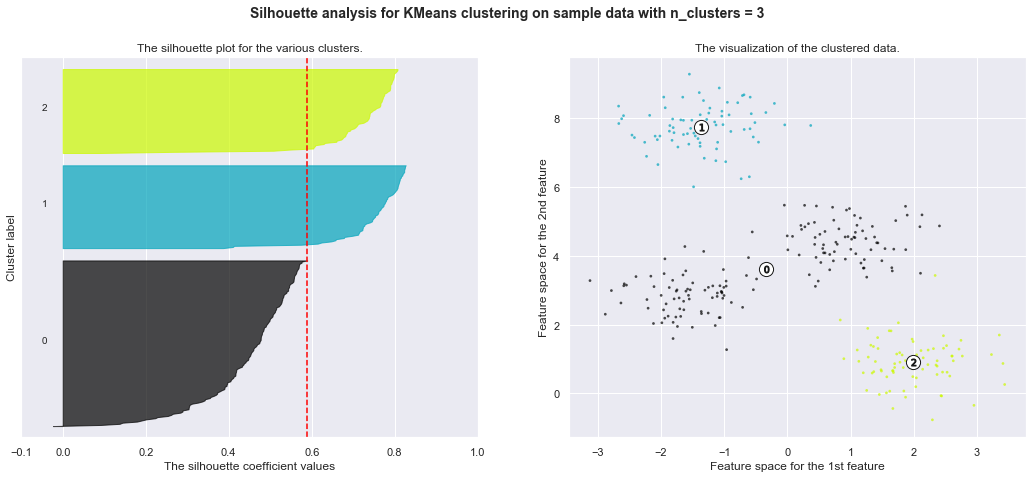

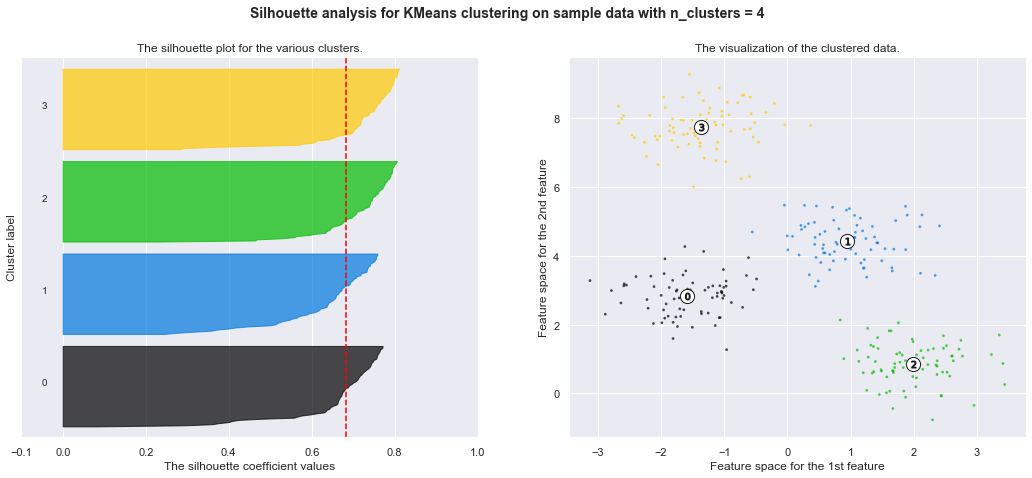

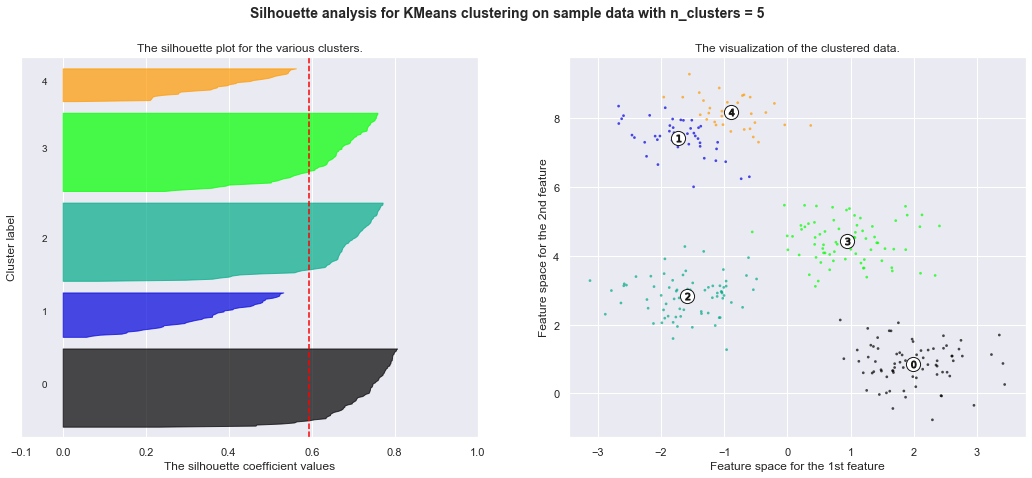

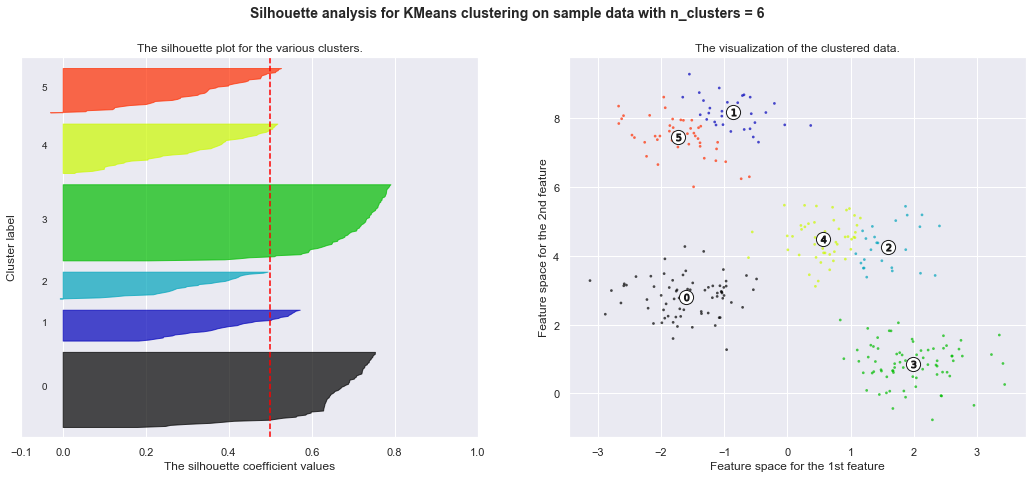

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [13]:
def silhoutte_KMean(X,n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    return silhouette_avg



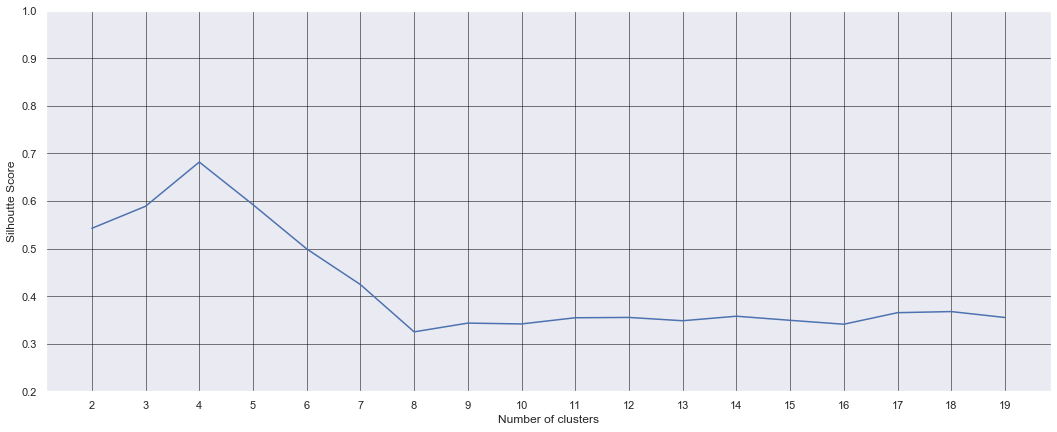

In [32]:
n_clusters_range = np.arange(2,20)
silhoutte_lst = np.zeros(len(n_clusters_range))
i = 0
for n_clusters in n_clusters_range:
    silhoutte_lst[i] = silhoutte_KMean(X,n_clusters)
    i += 1

fig, ax2 = plt.subplots()
fig.set_size_inches(18, 7)

ax2.plot(n_clusters_range,silhoutte_lst)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Silhoutte Score")
ax2.set_xticks(n_clusters_range)
ax2.set_ylim([0.2, 1])
# Customize the grid
ax2.grid(linestyle='-', linewidth='0.5', color='black')

## Cluster evaluation with different measures

In [36]:
clusterer = KMeans(n_clusters=4, random_state=10)
labels = clusterer.fit_predict(X)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
labels_true = y_true
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('---------------supervised measures------------------------')
#homogeneity if all of its clusters contains only data points which are members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) 

#completeness if all the data points that are members of a given class are elements of the same cluster.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

#V-measure is the harmonic mean between homogeneity and completeness
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

#Simple matching coefficient
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print('---------------unsupervised measures------------------------')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 4
---------------supervised measures------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
---------------unsupervised measures------------------------
Silhouette Coefficient: 0.682
